In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

2023-12-11 10:05:39.047690: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 10:05:39.115217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 10:05:39.991058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model
reloaded_model = load_model("best_model.h5")

2023-12-11 10:05:41.500292: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-11 10:05:41.500355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2023-12-11 10:05:41.500371: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2023-12-11 10:05:41.500529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2023-12-11 10:05:41.500576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2023-12-11 10:05:41.500589: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


In [4]:
reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 512)               7873024   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 7,874,498
Trainable params: 7,874,498
Non-trainable params: 0
______________________________________________

In [5]:
output = reloaded_model.predict(validation_dataset)

2023-12-11 10:05:42.152957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 1s 69ms/step


In [6]:
img, label = validation_dataset.next()
y_pred = reloaded_model.predict(img)

1/1 [==============================] - 0s 76ms/step


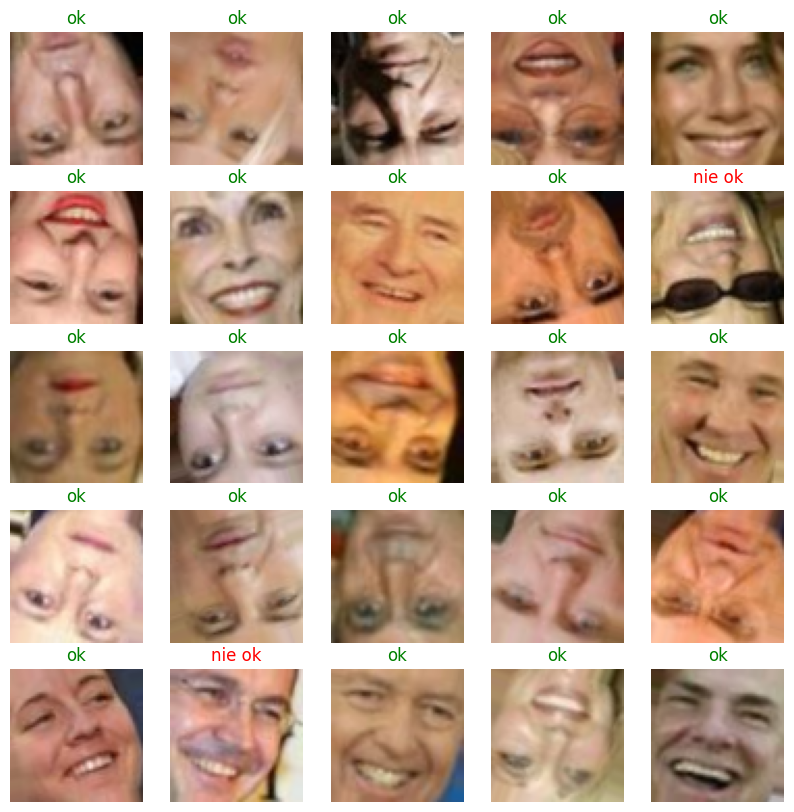

In [7]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')  